#                                       Predicting Offer Acceptance in Credit Card Marketing Campaigns

In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [343]:
data=pd.read_csv('creditcardmarketing-bbm.csv')

In [344]:
df=pd.DataFrame(data)

# Preprocessing

In [345]:
df.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [347]:
df.describe()

,Customer Number,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [348]:
df.shape

(18000, 17)

In [349]:
df.columns

Index(['Customer Number', 'Offer Accepted', 'Reward', 'Mailer Type',
       'Income Level', '# Bank Accounts Open', 'Overdraft Protection',
       'Credit Rating', '# Credit Cards Held', '# Homes Owned',
       'Household Size', 'Own Your Home', 'Average Balance', 'Q1 Balance',
       'Q2 Balance', 'Q3 Balance', 'Q4 Balance'],
      dtype='object')

In [350]:
df.isnull().sum()

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

In [351]:
df=df.fillna(0)

In [352]:
df.isnull().sum()

Customer Number         0
Offer Accepted          0
Reward                  0
Mailer Type             0
Income Level            0
# Bank Accounts Open    0
Overdraft Protection    0
Credit Rating           0
# Credit Cards Held     0
# Homes Owned           0
Household Size          0
Own Your Home           0
Average Balance         0
Q1 Balance              0
Q2 Balance              0
Q3 Balance              0
Q4 Balance              0
dtype: int64

In [353]:
df.dtypes

Customer Number           int64
Offer Accepted           object
Reward                   object
Mailer Type              object
Income Level             object
# Bank Accounts Open      int64
Overdraft Protection     object
Credit Rating            object
# Credit Cards Held       int64
# Homes Owned             int64
Household Size            int64
Own Your Home            object
Average Balance         float64
Q1 Balance              float64
Q2 Balance              float64
Q3 Balance              float64
Q4 Balance              float64
dtype: object

In [354]:
df.duplicated().sum()

0

In [355]:
df=df.drop(columns=['Customer Number','Overdraft Protection'])
df

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,No,Air Miles,Letter,High,1,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,1,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,No,Cash Back,Letter,High,1,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,No,Cash Back,Letter,High,1,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,No,Cash Back,Letter,Medium,1,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


# Label Encoding

In [357]:
cat_cols = ['Offer Accepted', 'Reward', 'Mailer Type', 'Income Level', 
             'Credit Rating', 'Own Your Home']
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [358]:
df.head()

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,0,0,0,0,1,0,2,1,4,0,1160.75,1669.0,877.0,1095.0,1002.0
1,0,0,0,2,1,2,2,2,5,1,147.25,39.0,106.0,78.0,366.0
2,0,0,1,0,2,2,2,1,2,1,276.50,367.0,352.0,145.0,242.0
3,0,0,0,2,2,0,1,1,4,0,1219.00,1578.0,1760.0,1119.0,419.0
4,0,0,0,2,1,2,2,1,6,1,1211.00,2140.0,1357.0,982.0,365.0


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Offer Accepted        18000 non-null  int32  
 1   Reward                18000 non-null  int32  
 2   Mailer Type           18000 non-null  int32  
 3   Income Level          18000 non-null  int32  
 4   # Bank Accounts Open  18000 non-null  int64  
 5   Credit Rating         18000 non-null  int32  
 6   # Credit Cards Held   18000 non-null  int64  
 7   # Homes Owned         18000 non-null  int64  
 8   Household Size        18000 non-null  int64  
 9   Own Your Home         18000 non-null  int32  
 10  Average Balance       18000 non-null  float64
 11  Q1 Balance            18000 non-null  float64
 12  Q2 Balance            18000 non-null  float64
 13  Q3 Balance            18000 non-null  float64
 14  Q4 Balance            18000 non-null  float64
dtypes: float64(5), int3

# Handling Inbalanced Data

In [361]:
target_value_count=df['Offer Accepted'].value_counts()

In [362]:
target_value_count

Offer Accepted
0    16977
1     1023
Name: count, dtype: int64

In [363]:
smote=SMOTE()
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'Offer Accepted')], df['Offer Accepted'])

In [364]:
print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 18000
Resampled balanced dataset shape 33954


In [365]:
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'Offer Accepted'))

In [366]:
balanced_df['Offer Accepted'] = y_smote

In [367]:
balanced_df.shape

(33954, 15)

In [368]:
target_value_count=balanced_df['Offer Accepted'].value_counts()
target_value_count

Offer Accepted
0    16977
1    16977
Name: count, dtype: int64

In [369]:
balanced_df.head()

,Reward,Mailer Type,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Offer Accepted
0,0,0,0,1,0,2,1,4,0,1160.75,1669.0,877.0,1095.0,1002.0,0
1,0,0,2,1,2,2,2,5,1,147.25,39.0,106.0,78.0,366.0,0
2,0,1,0,2,2,2,1,2,1,276.50,367.0,352.0,145.0,242.0,0
3,0,0,2,2,0,1,1,4,0,1219.00,1578.0,1760.0,1119.0,419.0,0
4,0,0,2,1,2,2,1,6,1,1211.00,2140.0,1357.0,982.0,365.0,0


In [370]:
balanced_df.duplicated().sum()

3

In [371]:
balanced_df.drop_duplicates(inplace = True)

In [372]:
balanced_df.duplicated().sum()

0

In [373]:
balanced_df.isnull().sum()

Reward                  0
Mailer Type             0
Income Level            0
# Bank Accounts Open    0
Credit Rating           0
# Credit Cards Held     0
# Homes Owned           0
Household Size          0
Own Your Home           0
Average Balance         0
Q1 Balance              0
Q2 Balance              0
Q3 Balance              0
Q4 Balance              0
Offer Accepted          0
dtype: int64

In [374]:
df1=balanced_df.copy()
df1

,Reward,Mailer Type,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Offer Accepted
0,0,0,0,1,0,2,1,4,0,1160.750000,1669.000000,877.000000,1095.000000,1002.000000,0
1,0,0,2,1,2,2,2,5,1,147.250000,39.000000,106.000000,78.000000,366.000000,0
2,0,1,0,2,2,2,1,2,1,276.500000,367.000000,352.000000,145.000000,242.000000,0
3,0,0,2,2,0,1,1,4,0,1219.000000,1578.000000,1760.000000,1119.000000,419.000000,0
4,0,0,2,1,2,2,1,6,1,1211.000000,2140.000000,1357.000000,982.000000,365.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33949,1,1,1,1,1,2,2,2,1,1164.042055,483.448591,1003.233634,1605.467289,1564.018705,1
33950,1,0,1,1,1,1,1,3,1,991.911706,388.659226,987.476190,1399.530259,1191.981151,1
33951,0,0,0,1,1,1,1,1,1,860.715519,910.942674,746.000000,877.825087,908.094316,1
33952,0,0,1,2,1,2,1,3,0,0.240245,0.331976,0.215493,0.273734,0.139779,1


In [375]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Reward,33951.0,0.796943,0.792121,0.0,0.000000,1.000000,1.000000,2.00
Mailer Type,33951.0,0.504227,0.499989,0.0,0.000000,1.000000,1.000000,1.00
Income Level,33951.0,1.129716,0.767697,0.0,1.000000,1.000000,2.000000,2.00
# Bank Accounts Open,33951.0,1.167948,0.397650,1.0,1.000000,1.000000,1.000000,3.00
Credit Rating,33951.0,0.940031,0.688211,0.0,0.000000,1.000000,1.000000,2.00
# Credit Cards Held,33951.0,1.745044,0.736731,1.0,1.000000,2.000000,2.000000,4.00
# Homes Owned,33951.0,1.130129,0.352274,1.0,1.000000,1.000000,1.000000,3.00
Household Size,33951.0,3.295661,1.046745,1.0,3.000000,3.000000,4.000000,9.00
Own Your Home,33951.0,0.541899,0.498249,0.0,0.000000,1.000000,1.000000,1.00
Average Balance,33951.0,934.073545,351.276259,0.0,788.425874,1007.000000,1150.274386,3366.25


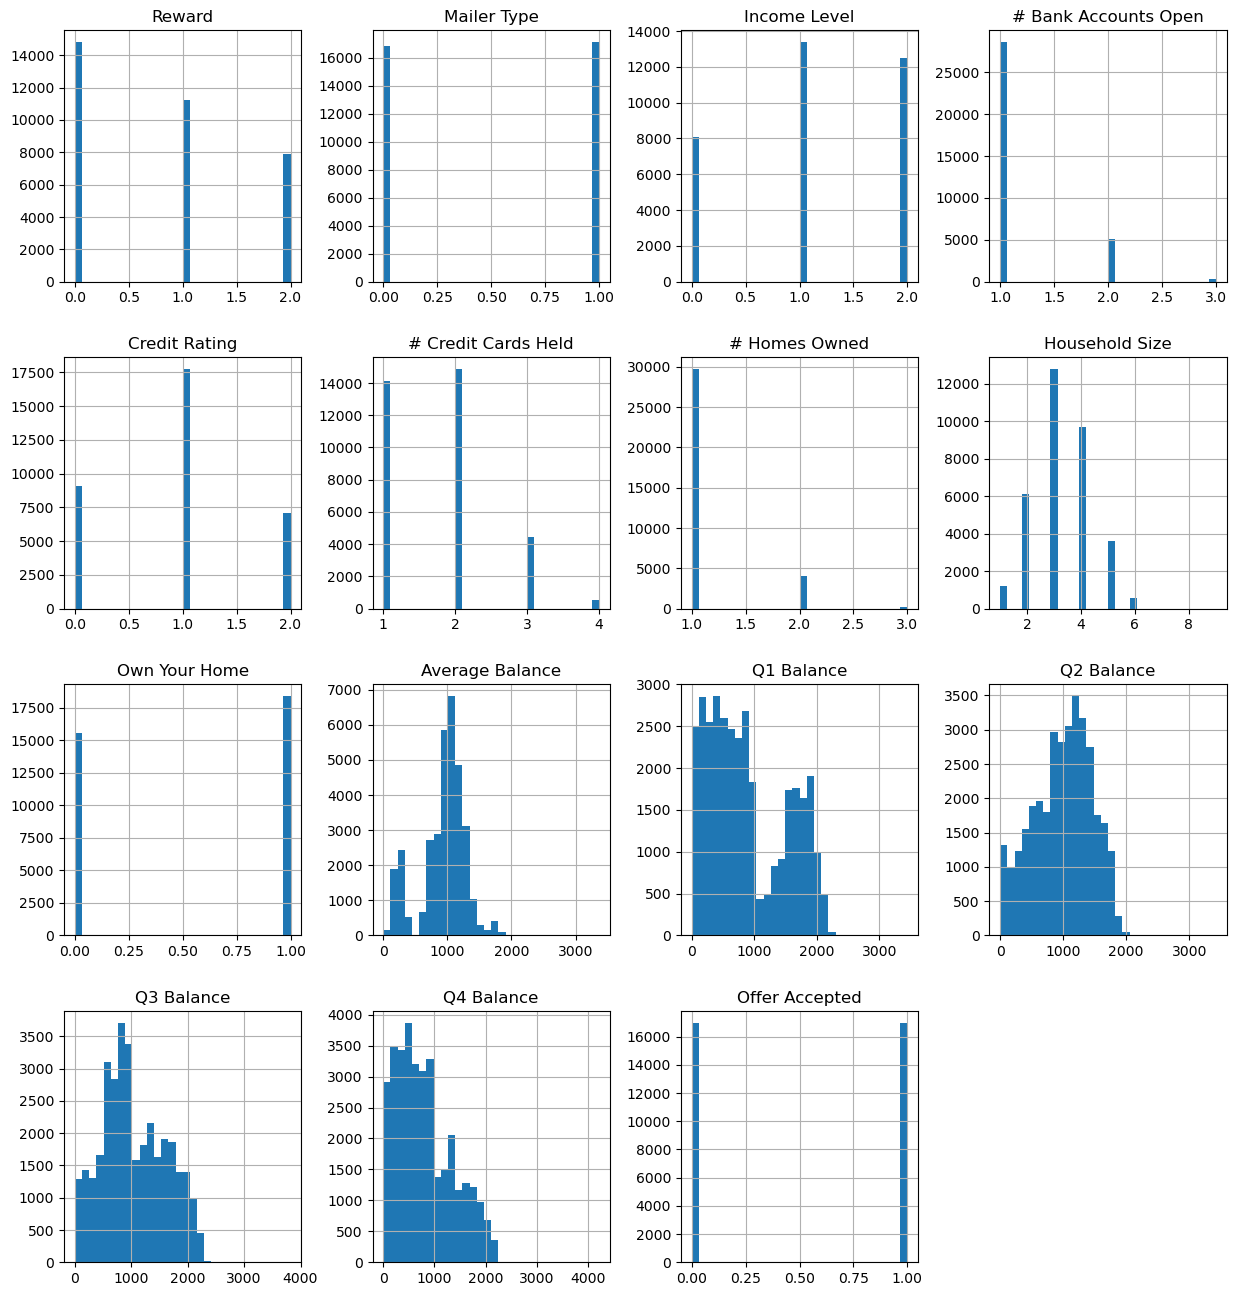

In [376]:
df1.hist(figsize=(15, 16), bins=30)
plt.show()

In [377]:
numerical_features = df1.select_dtypes(include = 'number')
print(numerical_features)

       Reward  Mailer Type  Income Level  # Bank Accounts Open  Credit Rating  \
0           0            0             0                     1              0   
1           0            0             2                     1              2   
2           0            1             0                     2              2   
3           0            0             2                     2              0   
4           0            0             2                     1              2   
...       ...          ...           ...                   ...            ...   
33949       1            1             1                     1              1   
33950       1            0             1                     1              1   
33951       0            0             0                     1              1   
33952       0            0             1                     2              1   
33953       0            1             0                     1              1   

       # Credit Cards Held 

# Handling Outliers

Text(0.5, 1.0, 'Box Plot of Credit Card Usage')

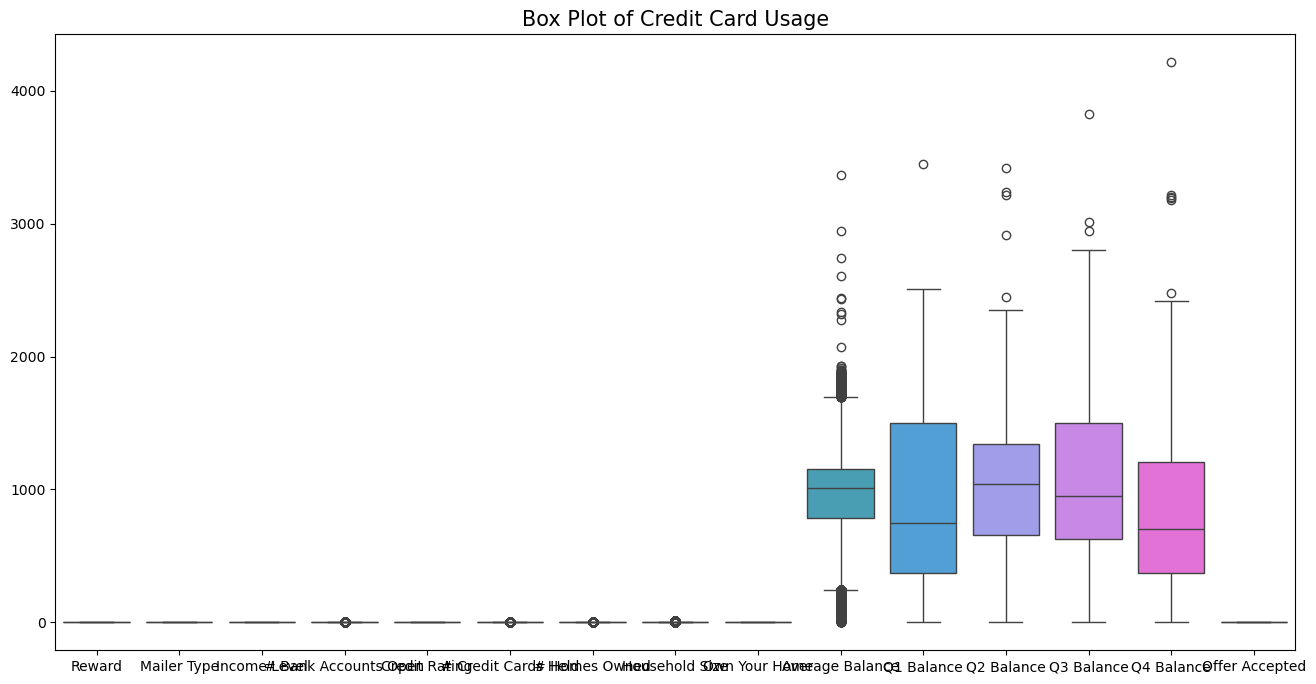

In [379]:
plt.figure(figsize = (16,8))
sns.boxplot(df1[numerical_features.columns])
plt.title("Box Plot of Credit Card Usage", fontsize=15)

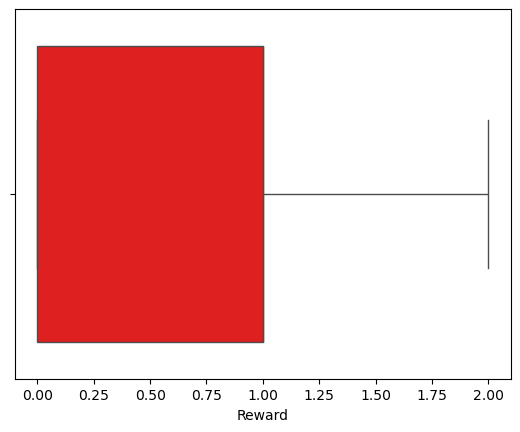

<Figure size 500x500 with 0 Axes>

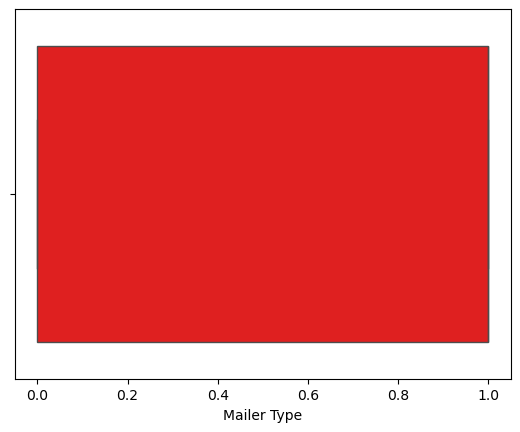

<Figure size 500x500 with 0 Axes>

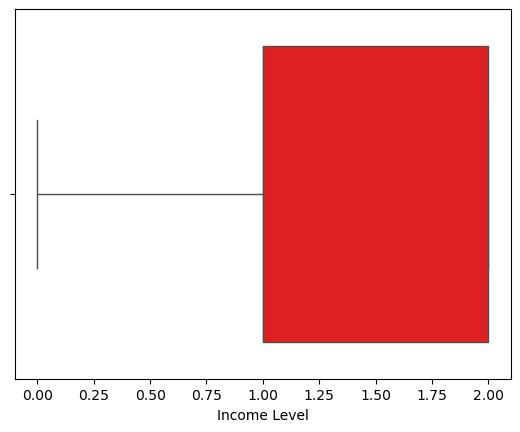

<Figure size 500x500 with 0 Axes>

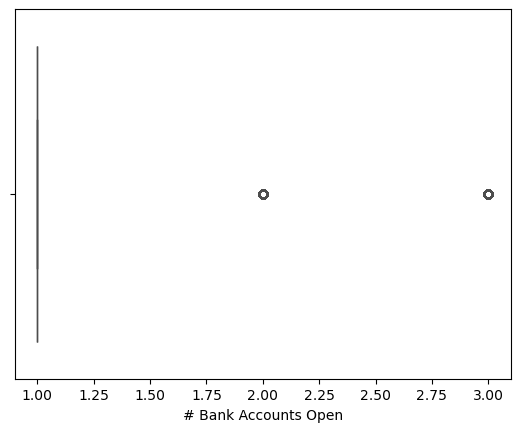

<Figure size 500x500 with 0 Axes>

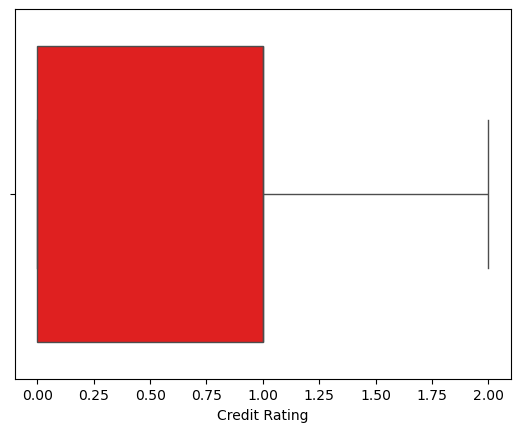

<Figure size 500x500 with 0 Axes>

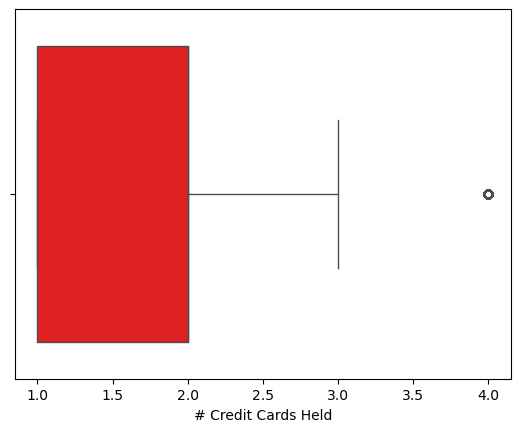

<Figure size 500x500 with 0 Axes>

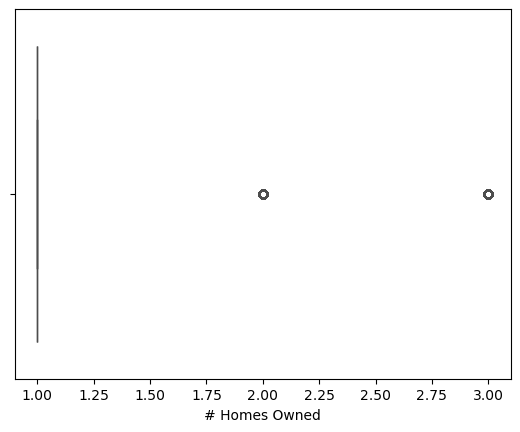

<Figure size 500x500 with 0 Axes>

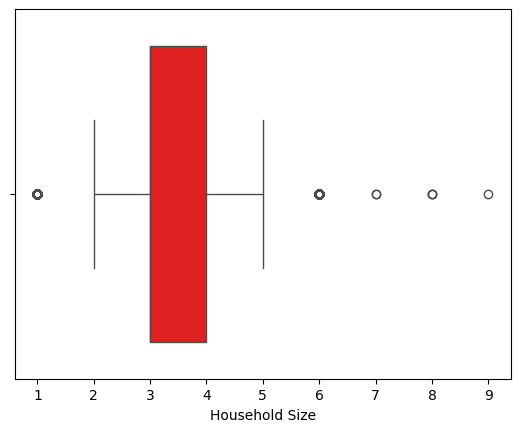

<Figure size 500x500 with 0 Axes>

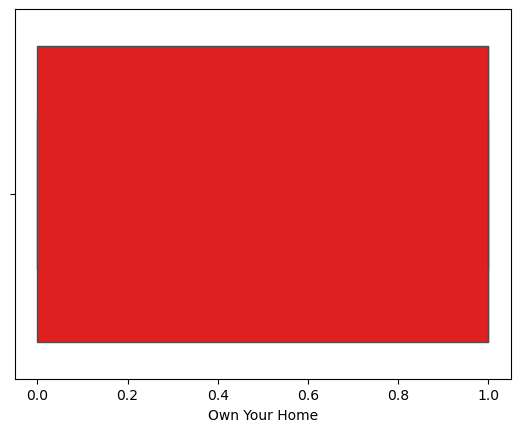

<Figure size 500x500 with 0 Axes>

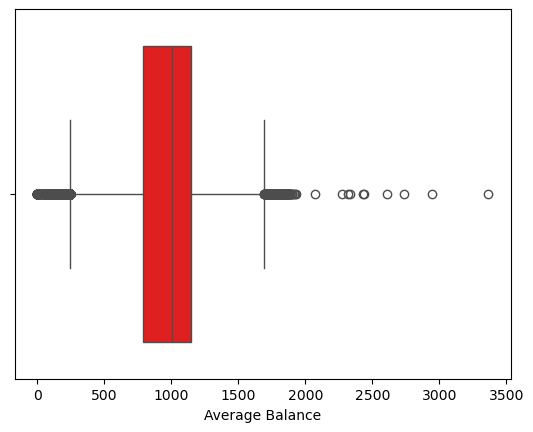

<Figure size 500x500 with 0 Axes>

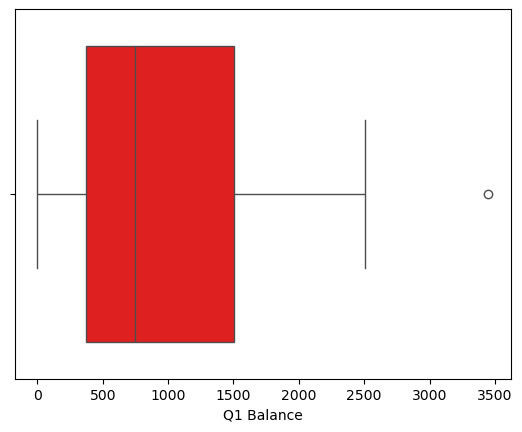

<Figure size 500x500 with 0 Axes>

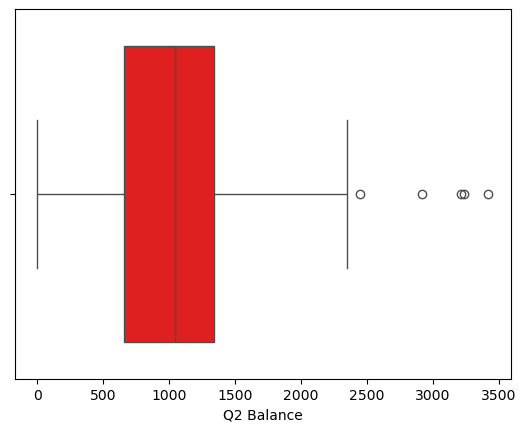

<Figure size 500x500 with 0 Axes>

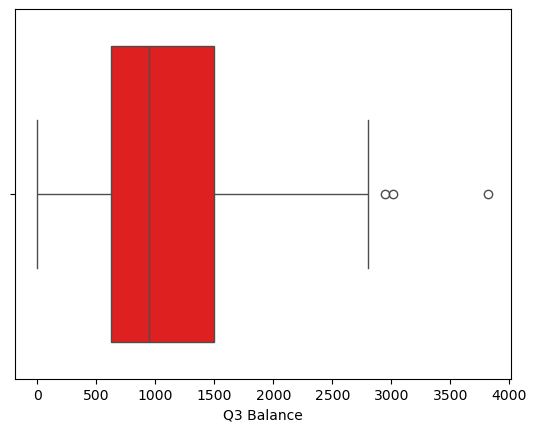

<Figure size 500x500 with 0 Axes>

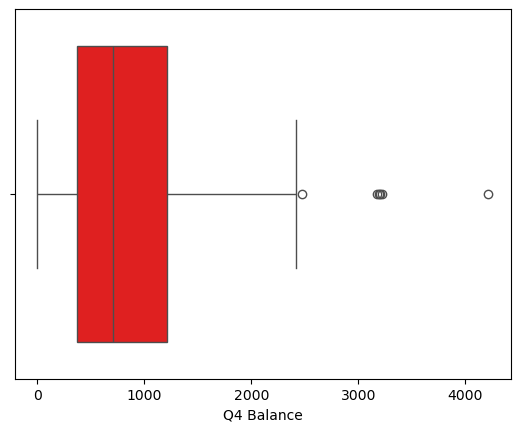

<Figure size 500x500 with 0 Axes>

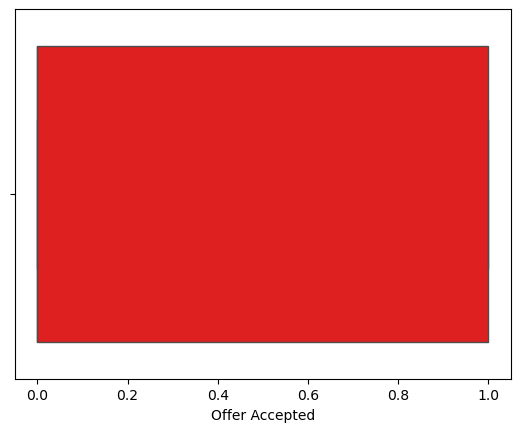

<Figure size 500x500 with 0 Axes>

In [380]:
for i in numerical_features.columns:
    sns.boxplot(x=i,data=df1,color ='red')
    plt.figure(figsize=(5, 5))
    plt.show()

In [381]:
def remove_outliers(df):
    for col in df1.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 =df[col].quantile(0.75)

        IQR =Q3-Q1
        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5* IQR)

        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x >upper else x)
    return df

In [382]:
df2 = remove_outliers(df1)

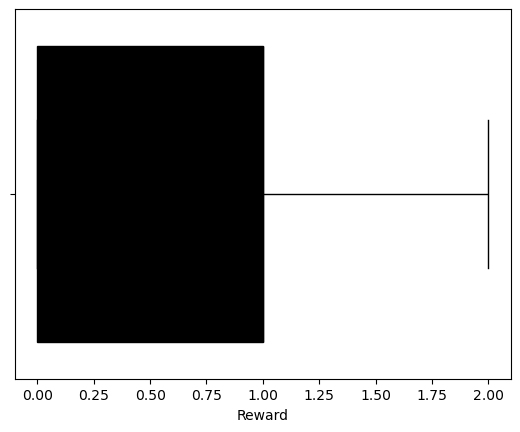

<Figure size 600x600 with 0 Axes>

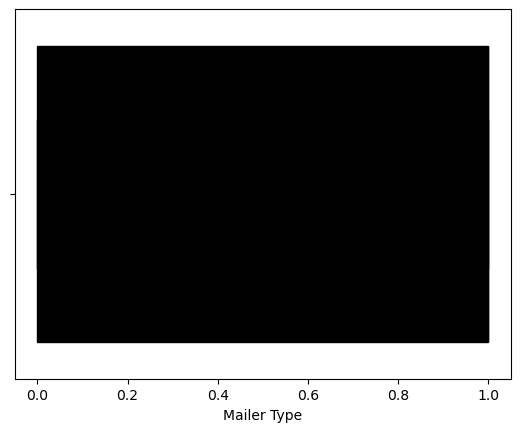

<Figure size 600x600 with 0 Axes>

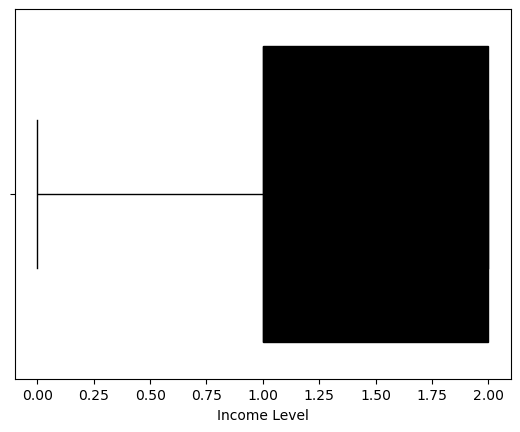

<Figure size 600x600 with 0 Axes>

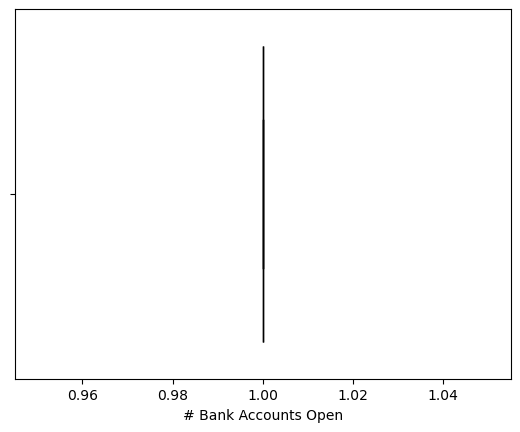

<Figure size 600x600 with 0 Axes>

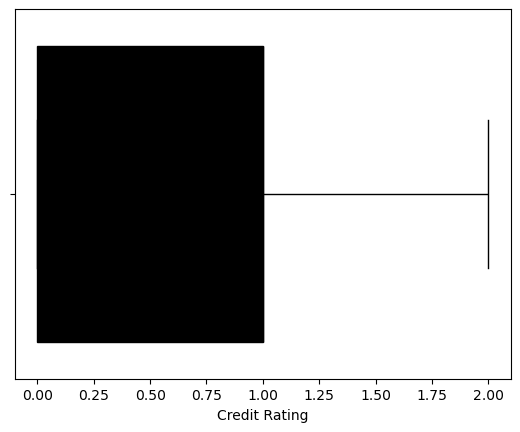

<Figure size 600x600 with 0 Axes>

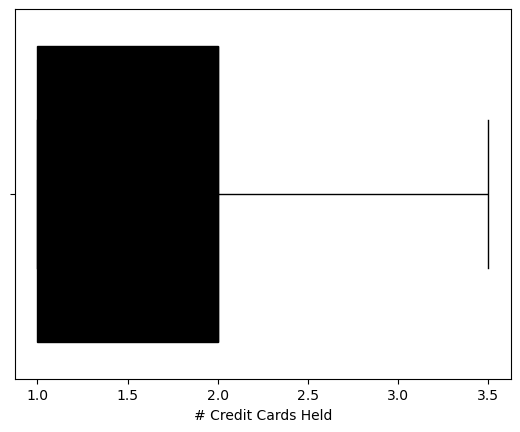

<Figure size 600x600 with 0 Axes>

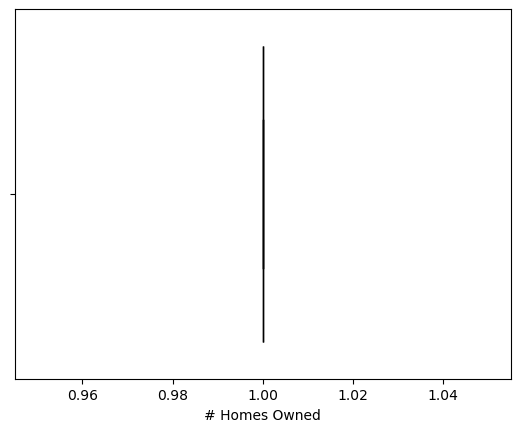

<Figure size 600x600 with 0 Axes>

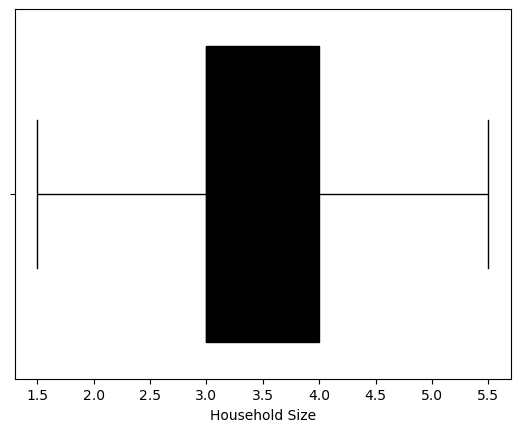

<Figure size 600x600 with 0 Axes>

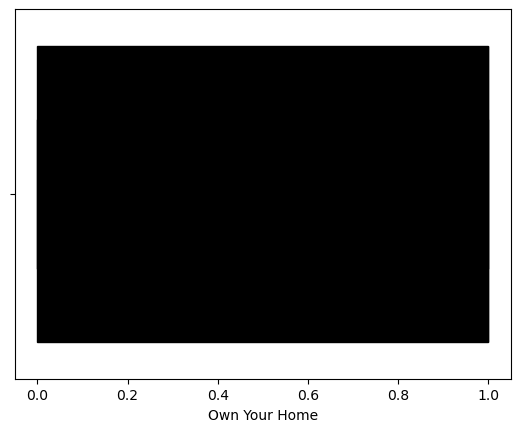

<Figure size 600x600 with 0 Axes>

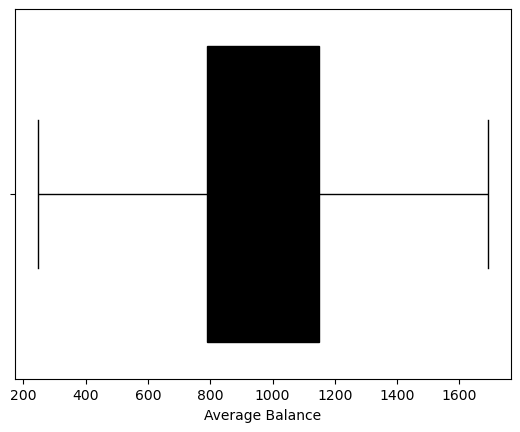

<Figure size 600x600 with 0 Axes>

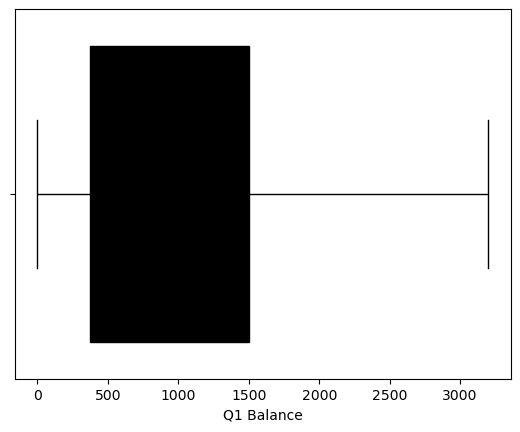

<Figure size 600x600 with 0 Axes>

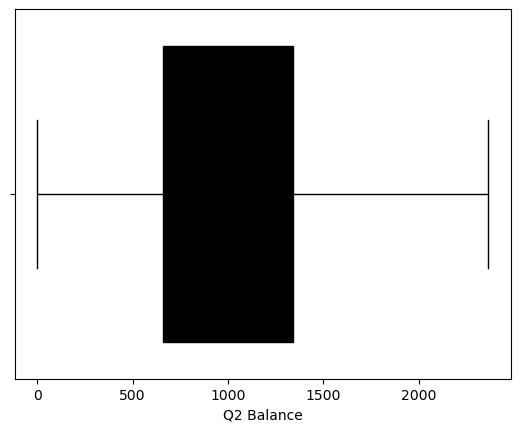

<Figure size 600x600 with 0 Axes>

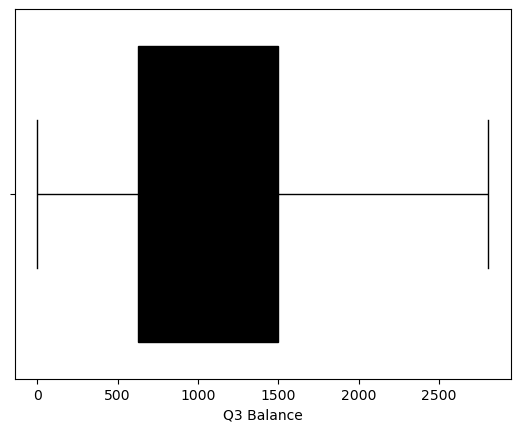

<Figure size 600x600 with 0 Axes>

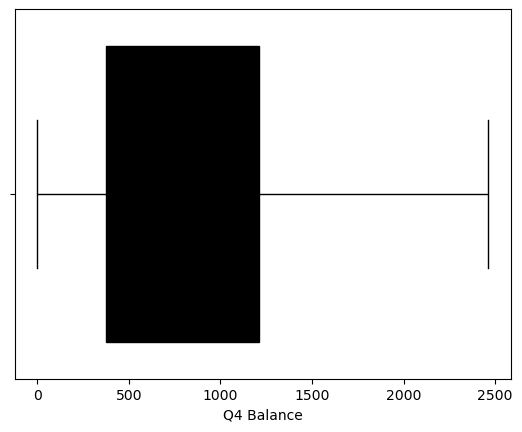

<Figure size 600x600 with 0 Axes>

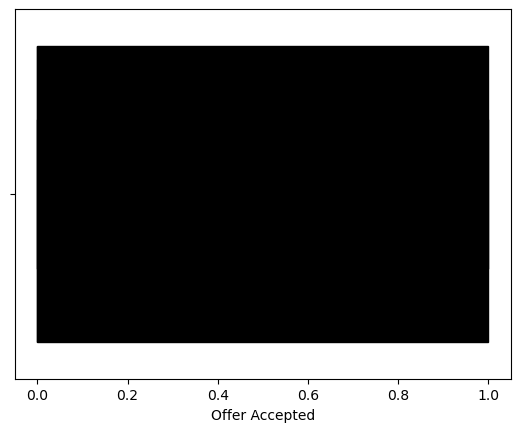

<Figure size 600x600 with 0 Axes>

In [383]:
for i in numerical_features.columns:
    sns.boxplot(x=i,data=df2,color ='black')
    plt.figure(figsize=(6, 6))
    plt.show()

# Handling Skewness

In [385]:
df3 = df2[numerical_features.columns]
df3

,Reward,Mailer Type,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Offer Accepted
0,0,0,0,1.0,0,2.0,1.0,4.0,0,1160.750000,1669.000000,877.000000,1095.000000,1002.000000,0
1,0,0,2,1.0,2,2.0,1.0,5.0,1,245.653107,39.000000,106.000000,78.000000,366.000000,0
2,0,1,0,1.0,2,2.0,1.0,2.0,1,276.500000,367.000000,352.000000,145.000000,242.000000,0
3,0,0,2,1.0,0,1.0,1.0,4.0,0,1219.000000,1578.000000,1760.000000,1119.000000,419.000000,0
4,0,0,2,1.0,2,2.0,1.0,5.5,1,1211.000000,2140.000000,1357.000000,982.000000,365.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33949,1,1,1,1.0,1,2.0,1.0,2.0,1,1164.042055,483.448591,1003.233634,1605.467289,1564.018705,1
33950,1,0,1,1.0,1,1.0,1.0,3.0,1,991.911706,388.659226,987.476190,1399.530259,1191.981151,1
33951,0,0,0,1.0,1,1.0,1.0,1.5,1,860.715519,910.942674,746.000000,877.825087,908.094316,1
33952,0,0,1,1.0,1,2.0,1.0,3.0,0,245.653107,0.331976,0.215493,0.273734,0.139779,1


In [386]:
df3.skew()

Reward                  0.377346
Mailer Type            -0.016908
Income Level           -0.225035
# Bank Accounts Open    0.000000
Credit Rating           0.078097
# Credit Cards Held     0.511489
# Homes Owned           0.000000
Household Size          0.172960
Own Your Home          -0.168193
Average Balance        -0.674027
Q1 Balance              0.458835
Q2 Balance             -0.264962
Q3 Balance              0.232329
Q4 Balance              0.620563
Offer Accepted          0.000177
dtype: float64

In [387]:
pt = PowerTransformer(method='yeo-johnson')

In [388]:
numerical_features = df3.select_dtypes(include=['int64','float64']).columns
numerical_features

Index(['Reward', 'Mailer Type', 'Income Level', '# Bank Accounts Open',
       'Credit Rating', '# Credit Cards Held', '# Homes Owned',
       'Household Size', 'Own Your Home', 'Average Balance', 'Q1 Balance',
       'Q2 Balance', 'Q3 Balance', 'Q4 Balance', 'Offer Accepted'],
      dtype='object')

In [390]:
df3[numerical_features] = pt.fit_transform(df3[numerical_features])
df3[numerical_features]

,Reward,Mailer Type,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Offer Accepted
0,-1.080760,-1.008489,-1.462299,0.0,-1.415478,0.537275,0.0,0.726986,-1.087623,0.650733,1.175167,-0.251456,0.175682,0.507740,-0.999912
1,-1.080760,-1.008489,1.139573,0.0,1.471262,0.537275,0.0,1.625560,0.919437,-1.847764,-1.971486,-1.959943,-2.069934,-0.707836,-0.999912
2,-1.080760,0.991582,-1.462299,0.0,1.471262,0.537275,0.0,-1.363643,0.919437,-1.793614,-0.739998,-1.406528,-1.839191,-1.062506,-0.999912
3,-1.080760,-1.008489,1.139573,0.0,-1.415478,-1.113179,0.0,0.726986,-1.087623,0.857912,1.078320,1.658179,0.216059,-0.576081,-0.999912
4,-1.080760,-1.008489,1.139573,0.0,1.471262,0.537275,0.0,2.049111,0.919437,0.829179,1.635562,0.790169,-0.018271,-0.710416,-0.999912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33949,0.486455,0.991582,-0.180127,0.0,0.140109,0.537275,0.0,-1.363643,0.919437,0.662316,-0.482089,0.023480,0.985145,1.258144,1.000088
33950,0.486455,-1.008489,-0.180127,0.0,0.140109,-1.113179,0.0,-0.258072,0.919437,0.077771,-0.688969,-0.010795,0.669906,0.781831,1.000088
33951,-1.080760,-1.008489,-1.462299,0.0,0.140109,-1.113179,0.0,-1.979800,0.919437,-0.337399,0.249143,-0.537706,-0.203310,0.362034,1.000088
33952,-1.080760,-1.008489,-0.180127,0.0,0.140109,0.537275,0.0,-0.258072,-1.087623,-1.847764,-2.528392,-2.206881,-2.482147,-2.589547,1.000088


In [392]:
df3[numerical_features].skew()

Reward                  0.036980
Mailer Type            -0.016908
Income Level           -0.202699
# Bank Accounts Open    0.000000
Credit Rating          -0.095893
# Credit Cards Held     0.059029
# Homes Owned           0.000000
Household Size         -0.031534
Own Your Home          -0.168193
Average Balance        -0.189990
Q1 Balance             -0.149370
Q2 Balance             -0.289217
Q3 Balance             -0.148542
Q4 Balance             -0.115430
Offer Accepted          0.000177
dtype: float64

Text(0.5, 1.0, 'Credit Card Usage')

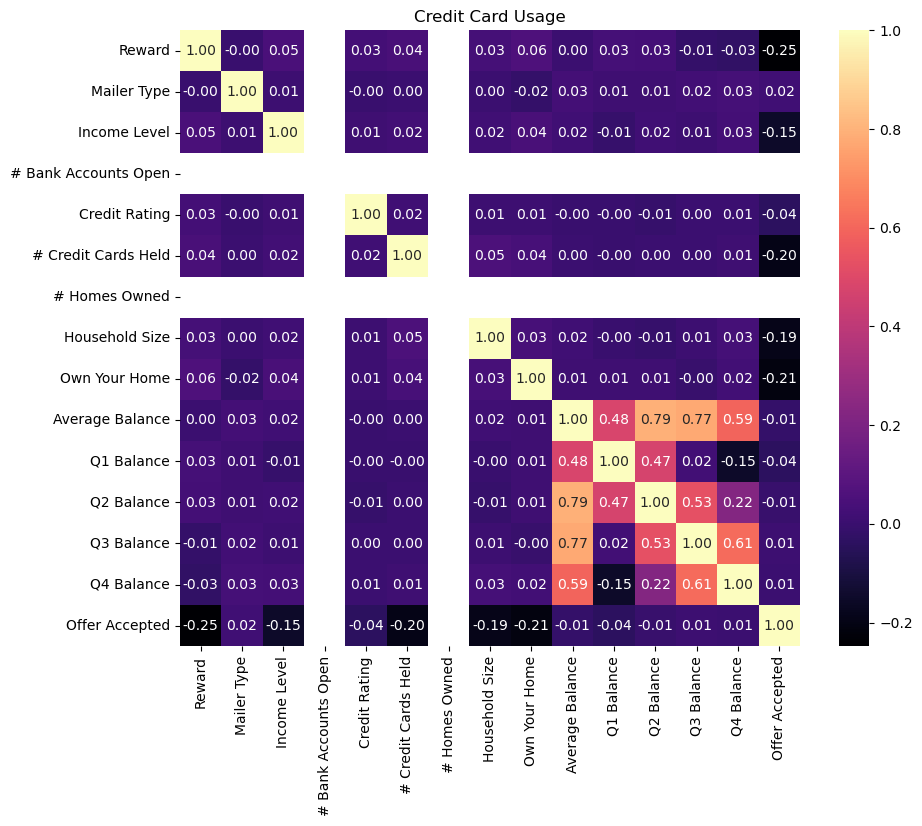

In [396]:
corr=df3.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='magma') 
plt.title("Credit Card Usage")

# Feature Selection

In [398]:
x = df3.drop(columns = ['Offer Accepted'])
y = df3['Offer Accepted']

In [400]:
sk = SelectKBest(score_func=f_classif,k=10)

In [402]:
x_new = sk.fit_transform(x,y)

In [406]:
selected_features = x.columns[sk.get_support()]

In [408]:
feature_score = pd.DataFrame({'Feature':x.columns,'score':sk.scores_}).sort_values(by='score',ascending =False)

In [410]:
print(selected_features )
print("/nfeature scores:")
print(feature_score)

Index(['Reward', 'Mailer Type', 'Income Level', 'Credit Rating',
       '# Credit Cards Held', 'Household Size', 'Own Your Home',
       'Average Balance', 'Q1 Balance', 'Q3 Balance'],
      dtype='object')
/nfeature scores:
                 Feature        score
0                 Reward  2222.945955
8          Own Your Home  1595.952131
5    # Credit Cards Held  1388.166011
7         Household Size  1298.063062
2           Income Level   831.432089
10            Q1 Balance    59.367893
4          Credit Rating    59.270956
1            Mailer Type     8.751817
9        Average Balance     6.711291
12            Q3 Balance     3.652071
11            Q2 Balance     1.222926
13            Q4 Balance     0.977271
3   # Bank Accounts Open          NaN
6          # Homes Owned          NaN


In [412]:
x_selected = x[selected_features]

In [416]:
x_selected.head()

,Reward,Mailer Type,Income Level,Credit Rating,# Credit Cards Held,Household Size,Own Your Home,Average Balance,Q1 Balance,Q3 Balance
0,-1.08076,-1.008489,-1.462299,-1.415478,0.537275,0.726986,-1.087623,0.650733,1.175167,0.175682
1,-1.08076,-1.008489,1.139573,1.471262,0.537275,1.625560,0.919437,-1.847764,-1.971486,-2.069934
2,-1.08076,0.991582,-1.462299,1.471262,0.537275,-1.363643,0.919437,-1.793614,-0.739998,-1.839191
3,-1.08076,-1.008489,1.139573,-1.415478,-1.113179,0.726986,-1.087623,0.857912,1.078320,0.216059
4,-1.08076,-1.008489,1.139573,1.471262,0.537275,2.049111,0.919437,0.829179,1.635562,-0.018271


# Scalling

In [419]:
scaler= StandardScaler()

In [421]:
x_scaled=scaler.fit_transform(x_selected)

In [423]:
x_scaled

array([[-1.08075994, -1.00848939, -1.46229893, ...,  0.6507332 ,
         1.17516656,  0.17568163],
       [-1.08075994, -1.00848939,  1.13957328, ..., -1.84776437,
        -1.97148562, -2.06993397],
       [-1.08075994,  0.99158207, -1.46229893, ..., -1.79361361,
        -0.7399982 , -1.83919147],
       ...,
       [-1.08075994, -1.00848939, -1.46229893, ..., -0.337399  ,
         0.24914318, -0.20331045],
       [-1.08075994, -1.00848939, -0.18012681, ..., -1.84776437,
        -2.52839226, -2.48214686],
       [-1.08075994,  0.99158207, -1.46229893, ...,  0.89077254,
        -0.36657666,  1.0853289 ]])

# Train Test Split

In [428]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [432]:
print(f"x_train:{x_train.shape}\nx_test:{x_test.shape}\ny_train:{y_train.shape}\ny_test:{y_test.shape}\n")

x_train:(27160, 10)
x_test:(6791, 10)
y_train:(27160,)
y_test:(6791,)

